# Explore

In [88]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk.sentiment
import wrangle

**Prep data**

In [26]:
train, val, test = wrangle.wrangle_readmes()

In [27]:
# Generate random numbers between 1 and 5
random_numbers = np.random.randint(1, 6, size=len(train))
train["rating"] = random_numbers
train.head(2)

,url,pros,cons,name,pros_cleaned_content,pros_lemmatized,cons_cleaned_content,cons_lemmatized,rating
362,https://www.glassdoor.com/Reviews/Republic-Ser...,Good room for growth at republic!!!! High Sala...,None that I can think of at the moment Cant re...,Republic Services,good room for growth at republic high salary ...,good room growth republic high salary great be...,none that i can think of at the moment cant re...,none think moment cant really think con best j...,1
269,https://www.glassdoor.com/Reviews/Macquarie-Gr...,"Great culture, great benefits, the ability to ...",Experience in the firm can vary based on the d...,Macquarie Group,great culture great benefits the ability to pu...,great culture great benefit ability purchase e...,experience in the firm can vary based on the d...,experience firm vary based department team gre...,2


**Bigram generator**

In [28]:
def generate_bigrams(lemmatized):
    words = lemmatized.split()
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            bigram = " ".join(words[i:i+2])
            bigrams.append(bigram)

    return bigrams

**Bin ratting**

In [29]:
# Define bin edges
bin_edges = [0,1, 2, 3, 4]

# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four']

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)

,url,pros,cons,name,pros_cleaned_content,pros_lemmatized,cons_cleaned_content,cons_lemmatized,rating,binned_rating
362,https://www.glassdoor.com/Reviews/Republic-Ser...,Good room for growth at republic!!!! High Sala...,None that I can think of at the moment Cant re...,Republic Services,good room for growth at republic high salary ...,good room growth republic high salary great be...,none that i can think of at the moment cant re...,none think moment cant really think con best j...,1,One
269,https://www.glassdoor.com/Reviews/Macquarie-Gr...,"Great culture, great benefits, the ability to ...",Experience in the firm can vary based on the d...,Macquarie Group,great culture great benefits the ability to pu...,great culture great benefit ability purchase e...,experience in the firm can vary based on the d...,experience firm vary based department team gre...,2,Two


## 1. Are there differences in word/words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

### Pros

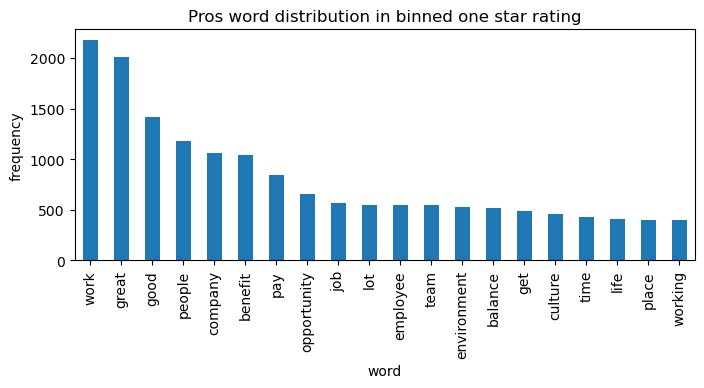

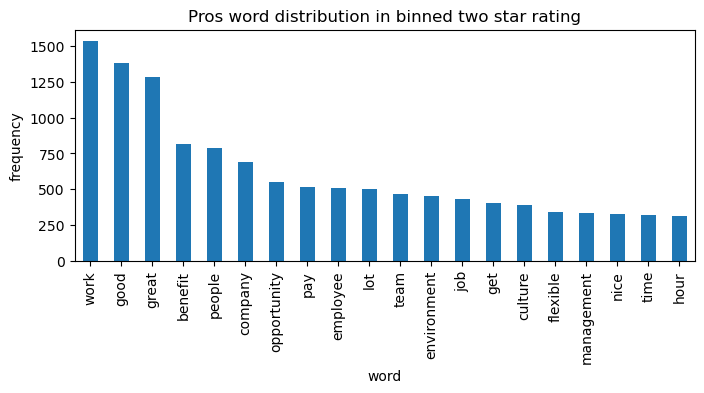

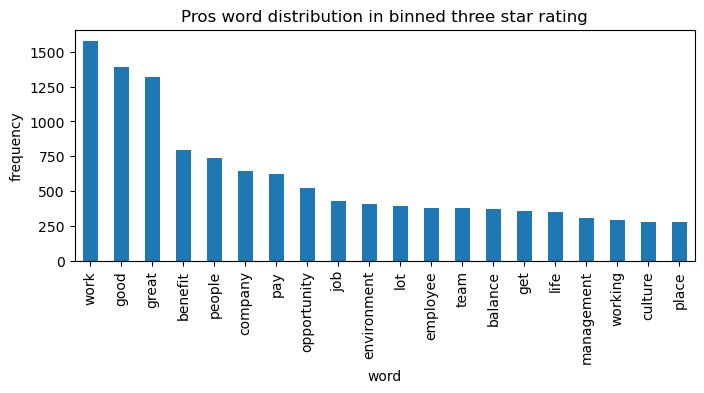

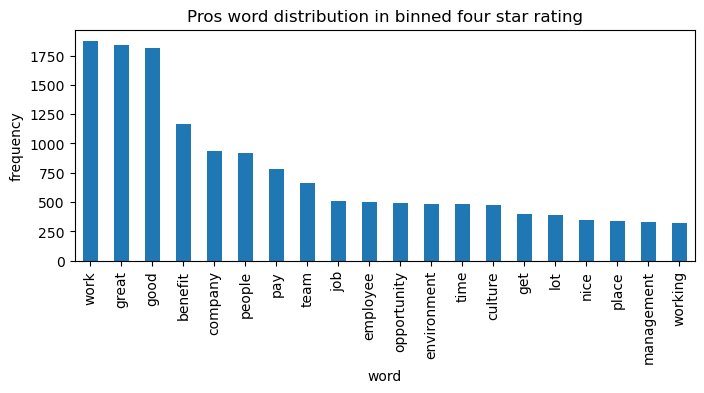

In [6]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Pros word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


### Pros bigram

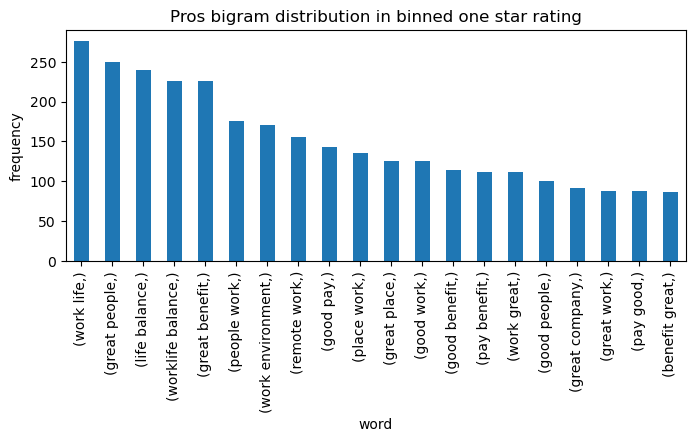

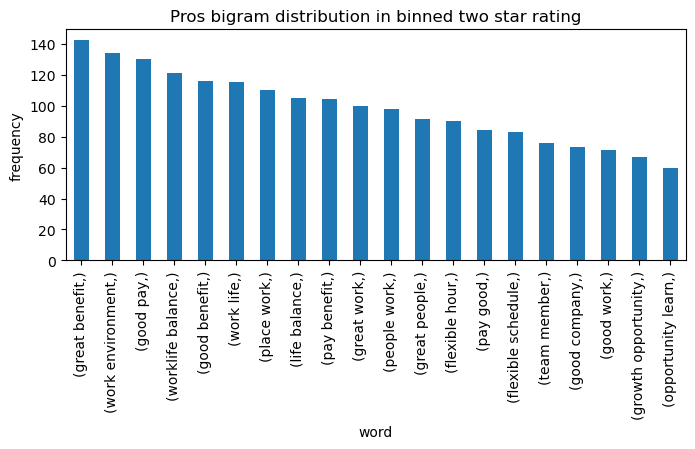

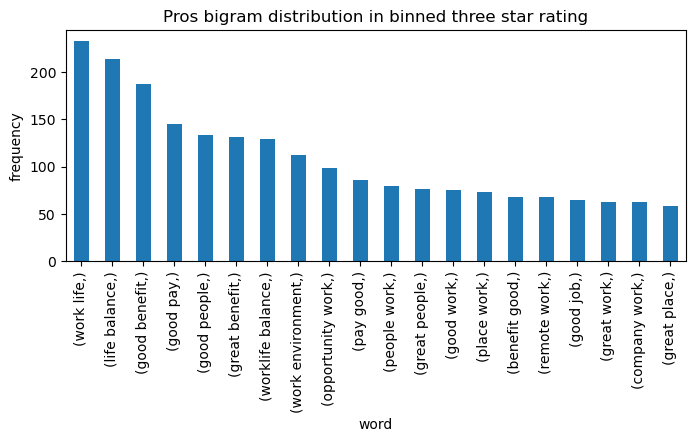

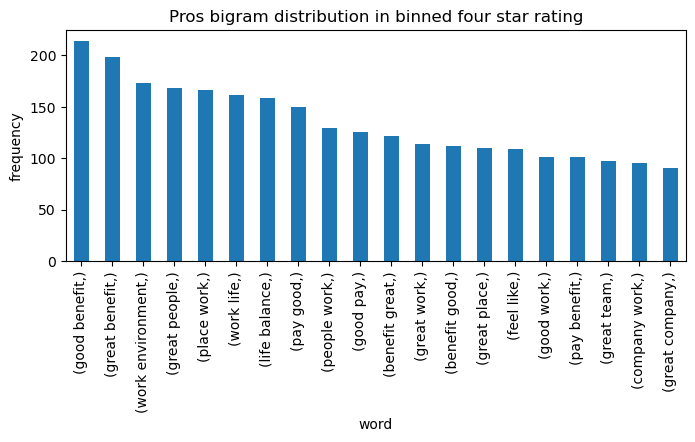

In [7]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Pros bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

### Cons

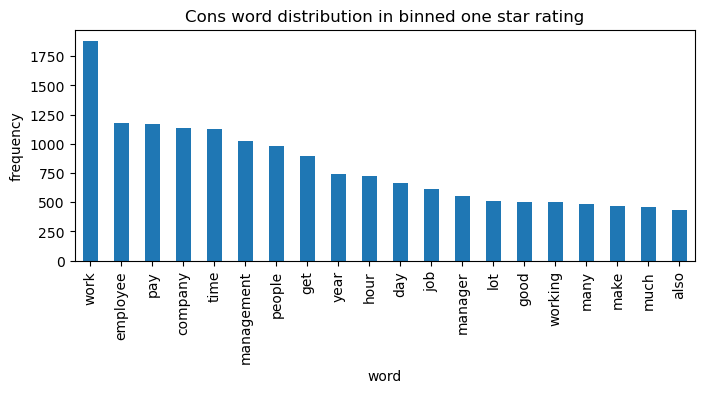

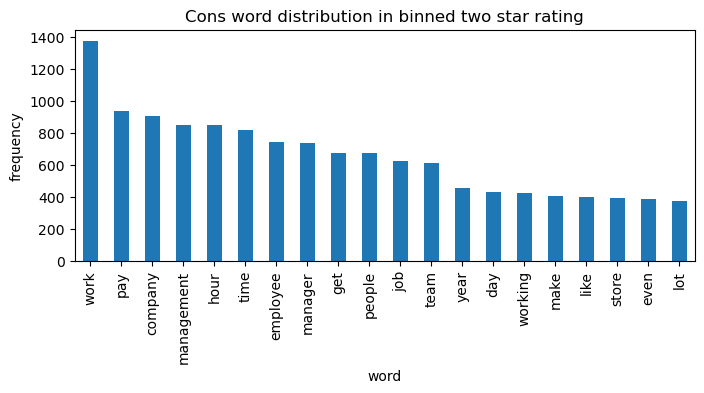

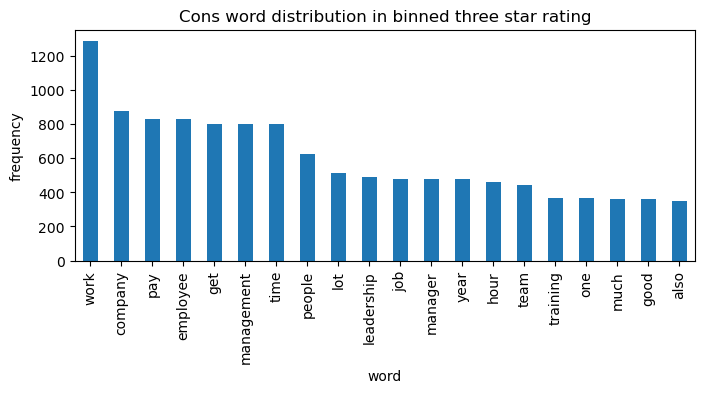

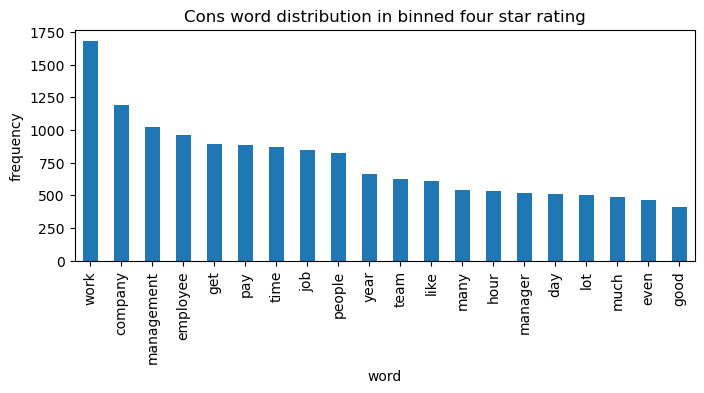

In [8]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Cons word distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


### Cons bigram

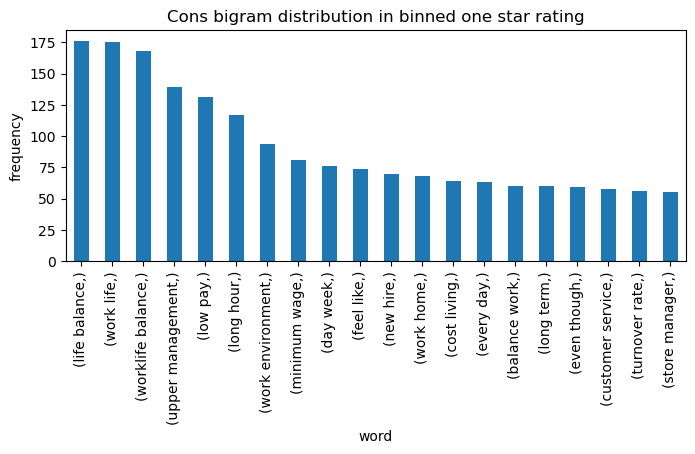

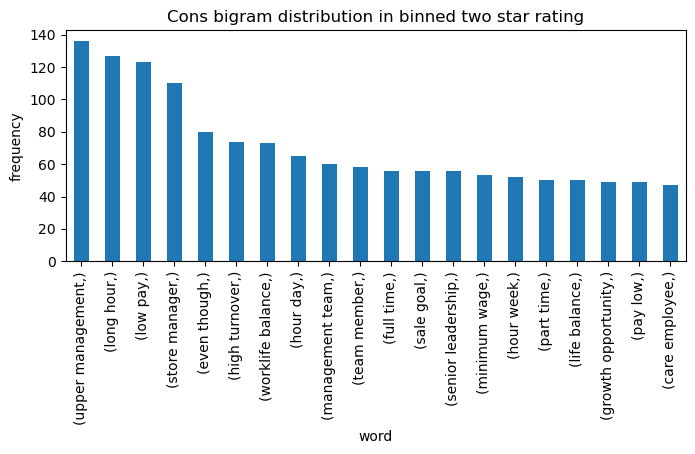

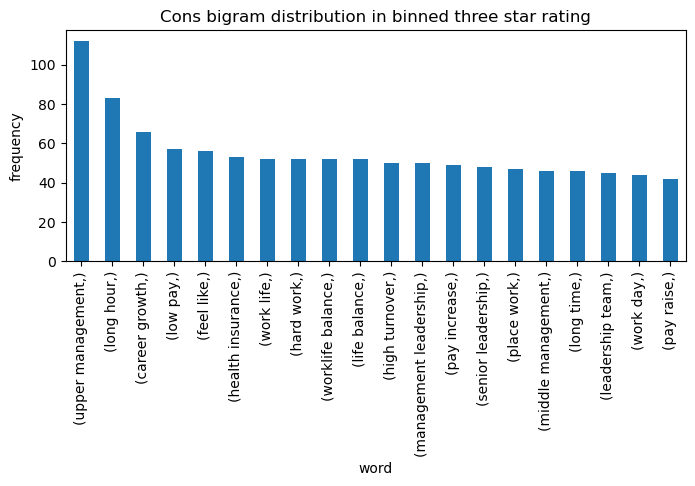

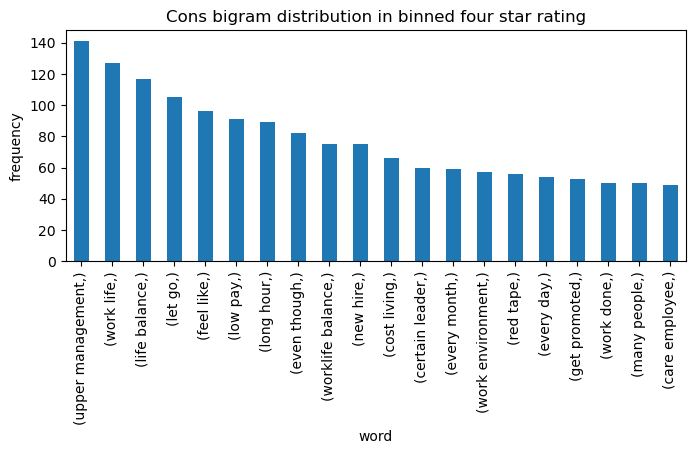

In [9]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Cons bigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

In [10]:
# combine all the pros/cons revies as one string
pros_bigrams = generate_bigrams(" ".join(train.pros_lemmatized.values))
cons_bigrams = generate_bigrams(" ".join(train.cons_lemmatized.values))
# add list of bigrams to a dataframe
pros_bigrams = pd.DataFrame({'comb_pros_bigrams': pros_bigrams})
cons_bigrams = pd.DataFrame({'comb_cons_bigrams': cons_bigrams})
pros_bigrams.head(3)

,comb_pros_bigrams
0,good room
1,room growth
2,growth republic


### Pros

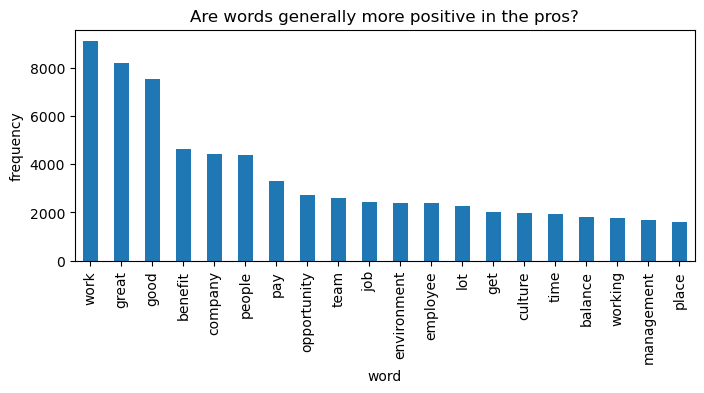

In [11]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

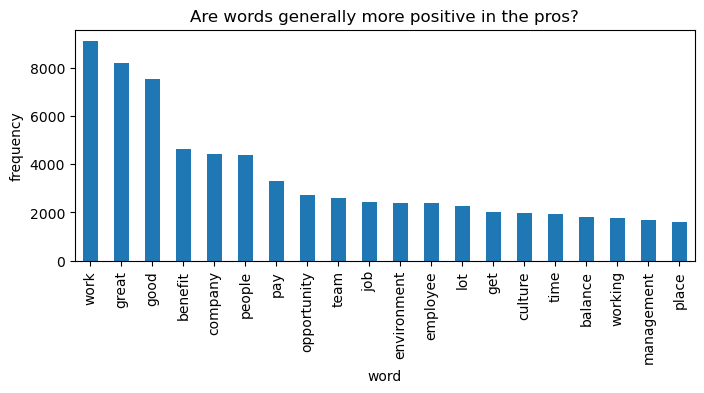

In [12]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Pros bigram

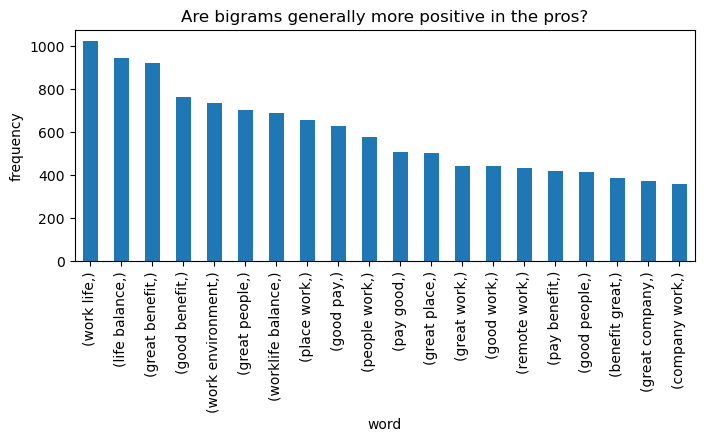

In [13]:
plt.figure(figsize=(8,3))
pd.Series(pros_bigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are bigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

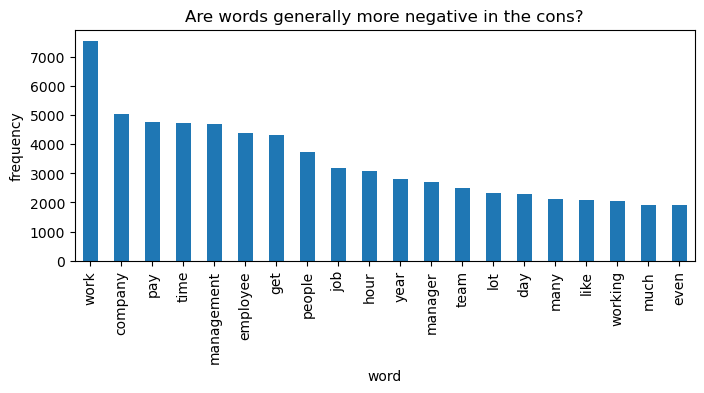

In [14]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more negative in the cons?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons bigram

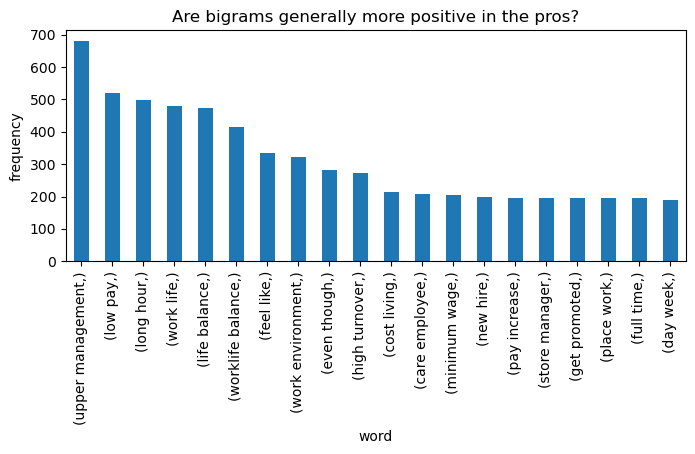

In [15]:
plt.figure(figsize=(8,3))
pd.Series(cons_bigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are bigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

### Pros

In [16]:
# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four']

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

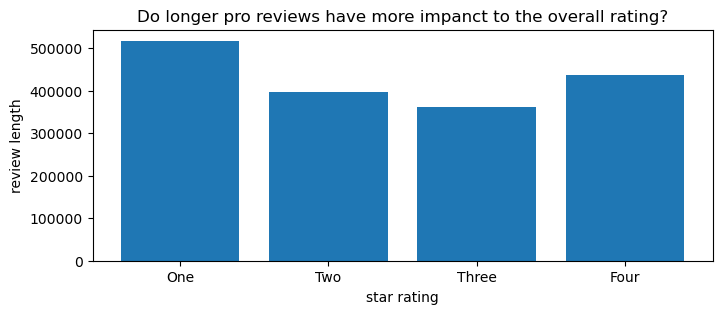

In [17]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

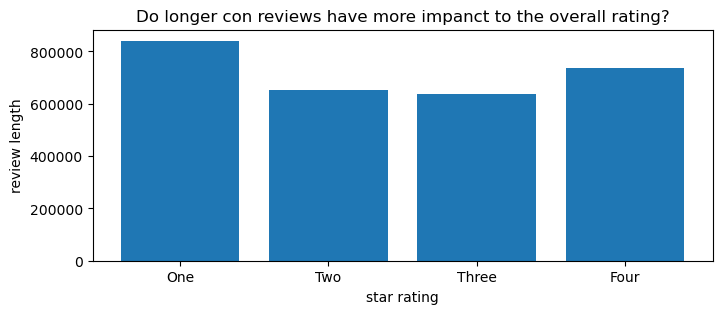

In [18]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [19]:
# Define bin labels
low_bin_labels = ['One', 'Two', 'Three']
high_bin_labels = ['Four']

### Low stars and positive sentiment (Combined pros and cons for each star)

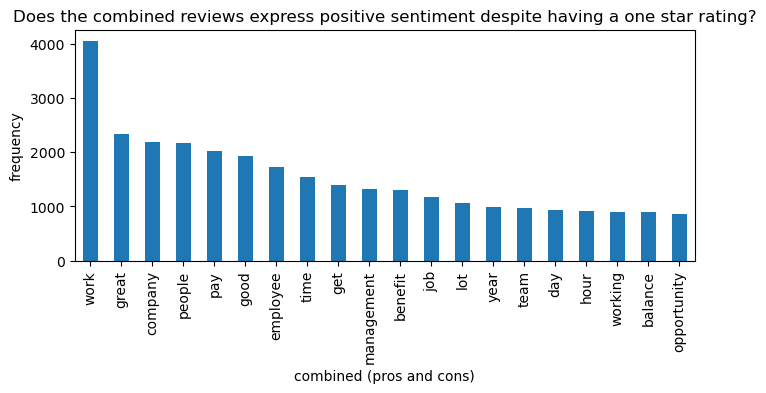

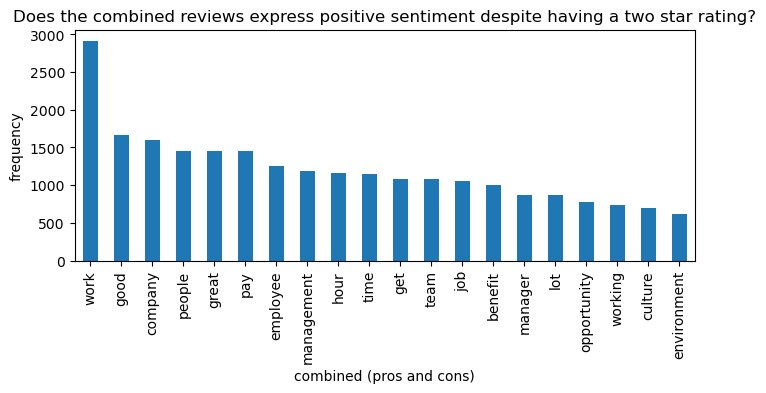

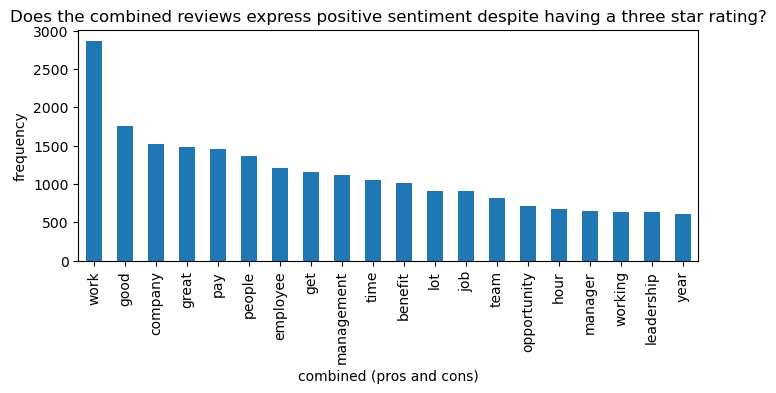

In [20]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### Low stars and positive sentiment (Combined pros bigram and cons bigram for each star)

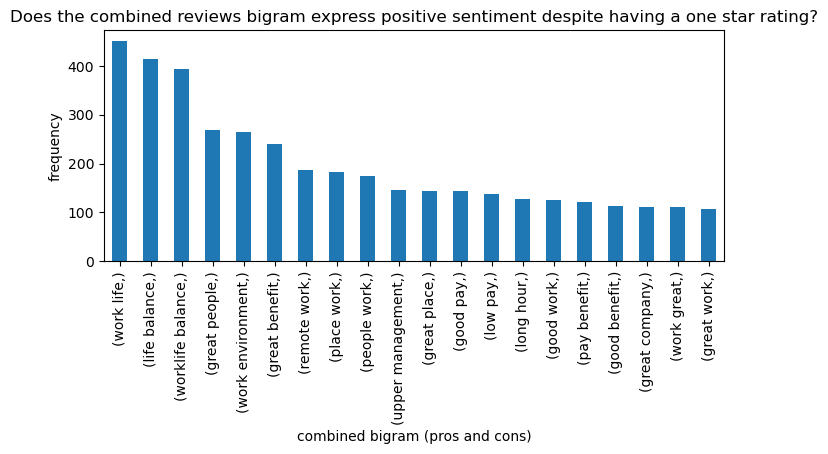

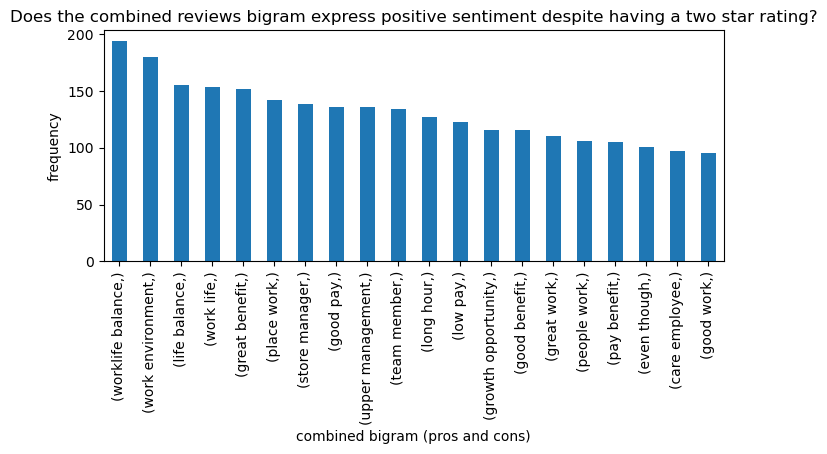

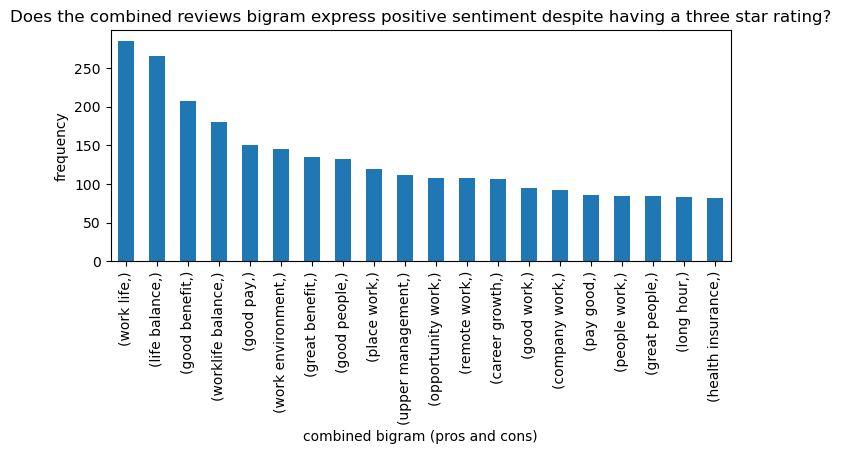

In [21]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews bigram express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined bigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros and cons for each star)

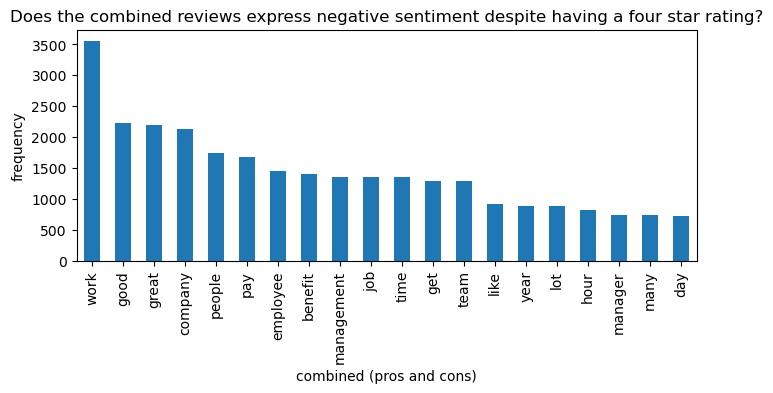

In [22]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

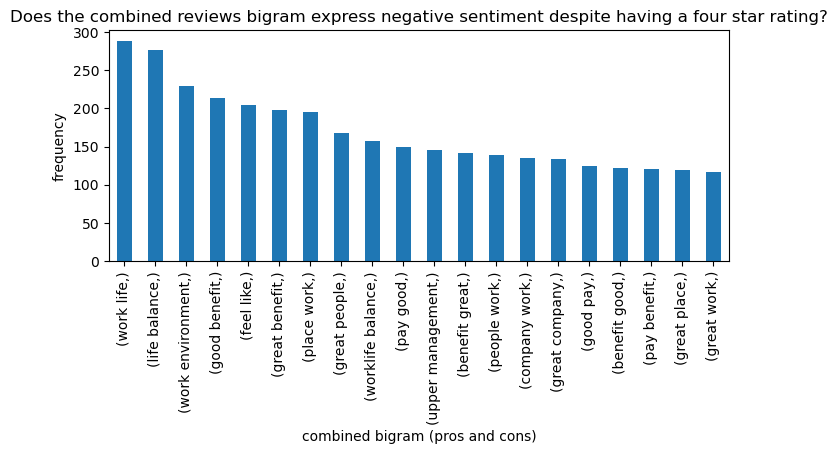

In [23]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews bigram express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined bigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

## 5. Are there any words that uniquely identify pros and cons?

In [40]:
# get the word frequencies for each category
pros_freq = pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts()
cons_freq = pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_freq = pd.Series(pros_cons_str.split()).value_counts()
all_freq

work             16686
great             9585
company           9439
good              9411
people            8110
                 ...  
closeout             1
signups              1
managementtoo        1
overexplained        1
h1b                  1
Length: 9808, dtype: int64

In [43]:
# concat all frequencies together into a dataframe
word_freq= pd.concat([pros_freq, cons_freq, all_freq], axis=1).fillna(0).astype(int)
word_freq.columns = ['pros_freq', 'cons_freq', 'all_freq']

word_freq

,pros_freq,cons_freq,all_freq
work,9125,7561,16686
great,8201,1384,9585
good,7534,1878,9411
benefit,4619,1125,5744
company,4413,5026,9439
...,...,...,...
loadprotocol,0,1,1
performanceprotocol,0,1,1
priceyno,0,1,1
wheelno,0,1,1


### Pros

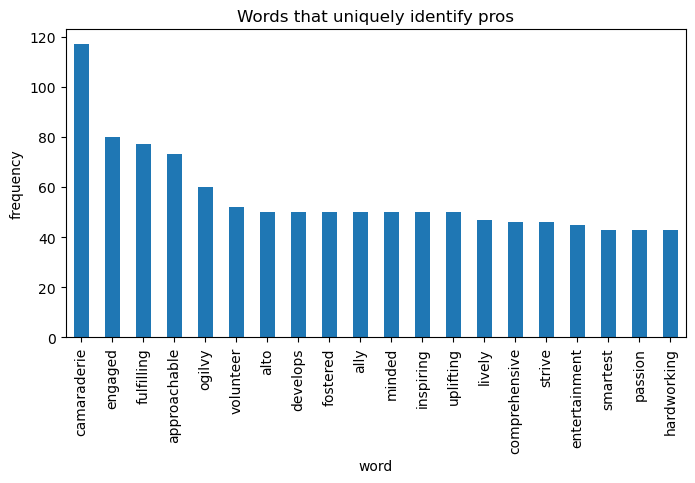

In [67]:
word_freq.pros_freq[word_freq.cons_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify pros")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Pros bigram

In [77]:
# get the word frequencies for each category
pros_bi_freq = pd.Series(generate_bigrams(" ".join(train.pros_lemmatized.values))).value_counts()
cons_bi_freq = pd.Series(generate_bigrams(" ".join(train.cons_lemmatized.values))).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_bi_freq = pd.Series(generate_bigrams(pros_cons_str)).value_counts()
all_bi_freq

work life           1503
life balance        1420
worklife balance    1104
work environment    1060
great benefit        950
                    ... 
class club             1
break great            1
workout lunch          1
get workout            1
sponsers h1b           1
Length: 69466, dtype: int64

In [78]:
# concat all frequencies together into a dataframe
bi_word_freq= pd.concat([pros_bi_freq, cons_bi_freq, all_bi_freq], axis=1).fillna(0).astype(int)
bi_word_freq.columns = ['pros_bi_freq', 'cons_bi_freq', 'all_bi_freq']

bi_word_freq

,pros_bi_freq,cons_bi_freq,all_bi_freq
work life,1024,479,1503
life balance,945,475,1420
great benefit,922,28,950
good benefit,761,30,791
work environment,737,323,1060
...,...,...,...
claim giving,0,1,1
giving wfh,0,1,1
company atm,0,1,0
atmgood room,0,0,1


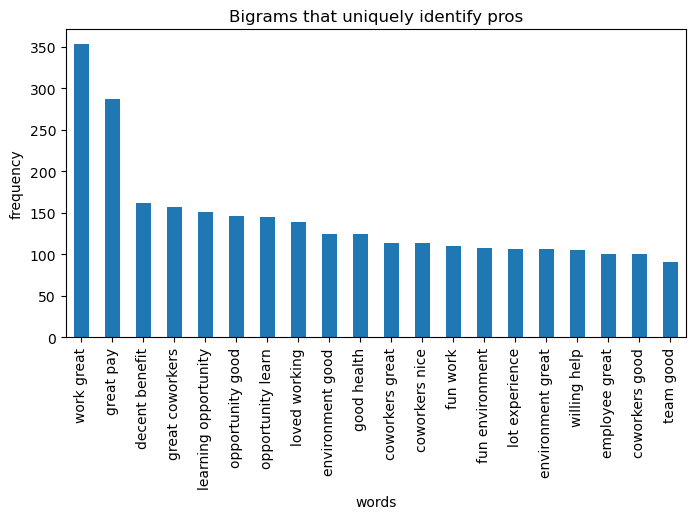

In [80]:
bi_word_freq.pros_bi_freq[bi_word_freq.cons_bi_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Bigrams that uniquely identify pros")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### Cons

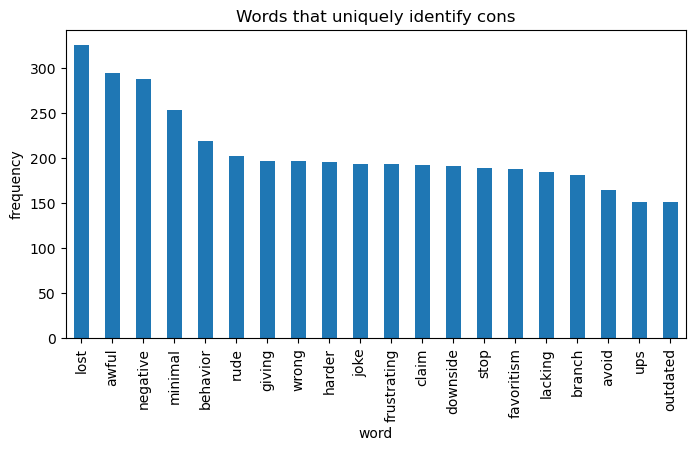

In [68]:
word_freq.cons_freq[word_freq.pros_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify cons")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons bigram

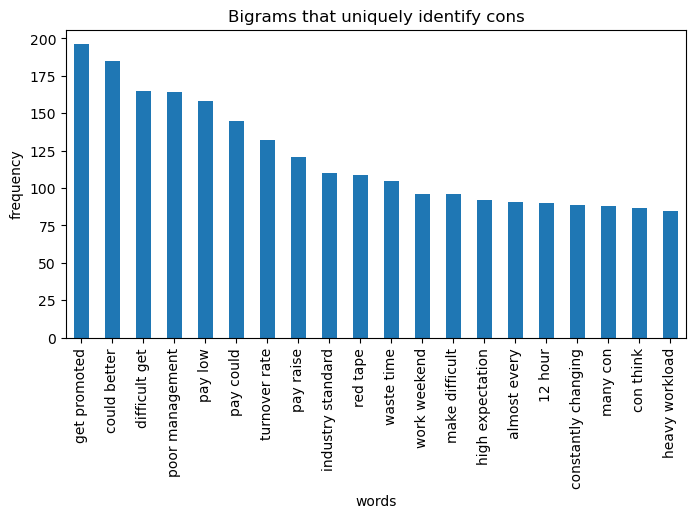

In [82]:
bi_word_freq.cons_bi_freq[bi_word_freq.pros_bi_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Bigrams that uniquely identify cons")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### 6. What are the top words found in both pros and cons

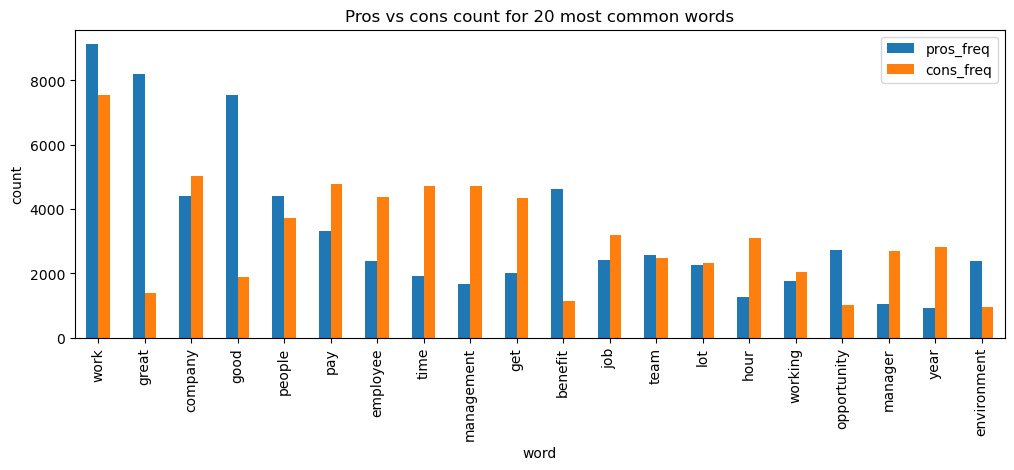

In [58]:
# plot most common words
word_freq.sort_values('all_freq', ascending=False)[['pros_freq', 'cons_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common words")
plt.xlabel("word")
plt.ylabel("count")
plt.show()

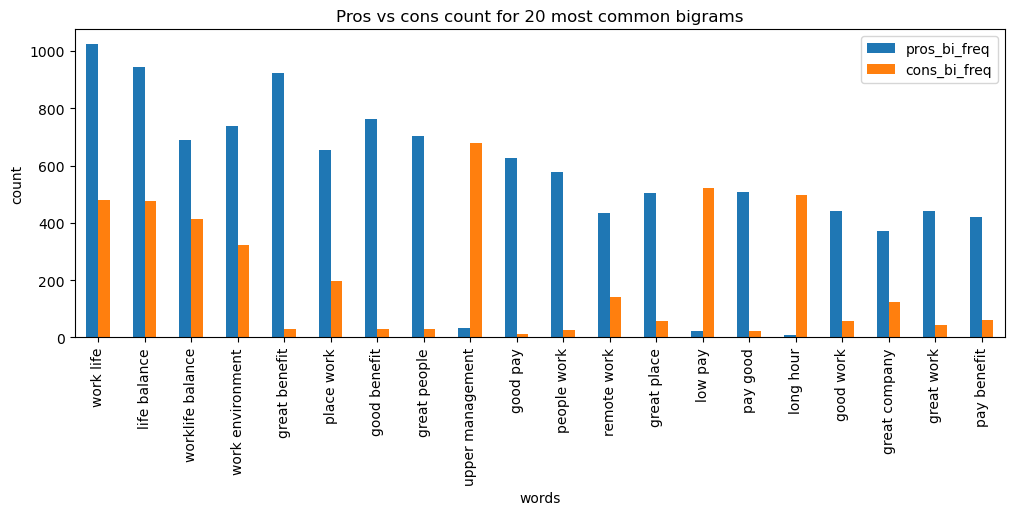

In [86]:
# plot most common words
bi_word_freq.sort_values('all_bi_freq', ascending=False)[['pros_bi_freq', 'cons_bi_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common bigrams")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

## 7. Identify the sentiment score for each company revies

In [89]:
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [104]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score
train['pros_sentiment'] = train.pros_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train.cons_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [105]:
train[["name","pros_lemmatized", "pros_lemmatized","pros_sentiment", "cons_sentiment"]].head()

,name,pros_lemmatized,pros_lemmatized,pros_sentiment,cons_sentiment
362,Republic Services,good room growth republic high salary great be...,good room growth republic high salary great be...,0.9999,0.9996
269,Macquarie Group,great culture great benefit ability purchase e...,great culture great benefit ability purchase e...,1.0000,0.9984
100,Motorola Mobility,company location great worklife balance good w...,company location great worklife balance good w...,1.0000,0.9997
98,UNC Chapel Hill,clear expectation roll there's great flexibili...,clear expectation roll there's great flexibili...,1.0000,0.9984
368,Rockwell Automation,culture people work life balance good place wo...,culture people work life balance good place wo...,0.9999,0.9987


### Pros

Text(0.5, 1.0, 'Pros sentiment distribution')

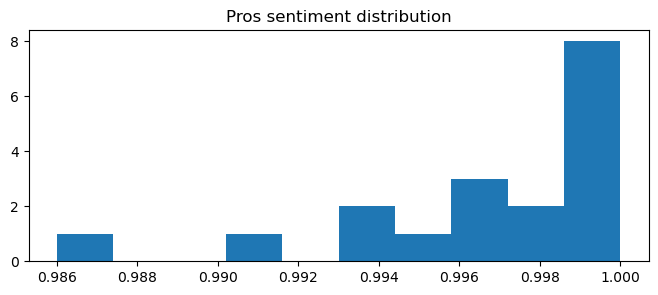

In [100]:
plt.figure(figsize=(8,3))
plt.hist(train.pros_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

### Cons

Text(0.5, 1.0, 'Pros sentiment distribution')

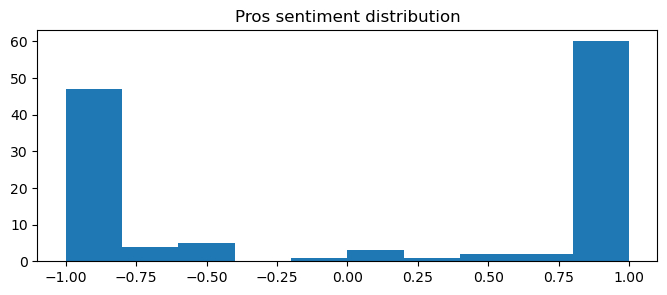

In [102]:
plt.figure(figsize=(8,3))
plt.hist(train.cons_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

## Take aways

## With more time
- word count
- stopword count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio